# 원, 삼각형, 사각형 구분하기

In [1]:
from google.colab import files
up = files.upload()

Saving handwriting_shape.zip to handwriting_shape.zip


In [2]:
!unzip handwriting_shape.zip -d handwriting > /dev/null

In [3]:
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

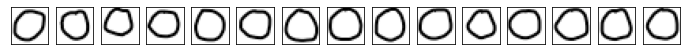

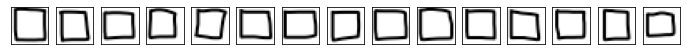

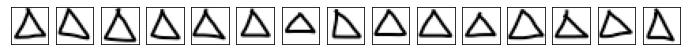

In [4]:
# Train dataset
shapes = ['circle','rectangle','triangle']
for shape in shapes:
    dir_name = f'handwriting/train/{shape}'
    plt.figure(figsize=(12,1))
    for i, fname in enumerate(glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1,15,i+1), plt.imshow(img)
        plt.xticks([]), plt.yticks([])
    plt.show()

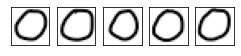

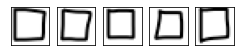

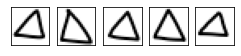

In [5]:
# Test dataset
for shape in shapes:
    dir_name = f'handwriting/test/{shape}'
    plt.figure(figsize=(4,1))
    for i, fname in enumerate(glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1,5,i+1), plt.imshow(img)
        plt.xticks([]), plt.yticks([])
    plt.show()

In [6]:
import cv2
cv2.imread('handwriting/train/circle/circle001.png')[:,:,::-1].shape

(24, 24, 3)

- 데이터셋 생성하기

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
train_data_generator = train_datagen.flow_from_directory(
    'handwriting/train', target_size=(24,24), batch_size=3, class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1/255.)
test_data_generator = test_datagen.flow_from_directory(
    'handwriting/test', target_size=(24,24), batch_size=3, class_mode='categorical'
)

Found 15 images belonging to 3 classes.


In [9]:
train_data_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [10]:
train_data_generator.filenames[0]

'circle/circle001.png'

- 모델 정의/설정/학습/평가

In [11]:
import numpy as np
import tensorflow as tf
seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [13]:
model = Sequential([ 
    Conv2D(32, (3,3), input_shape=(24,24,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               819328    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                        

In [14]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [15]:
model.fit(
    train_data_generator, steps_per_epoch=15, epochs=50,
    validation_data=test_data_generator, validation_steps=5
)

Epoch 1/50
15/15 [==============================] - 1s 46ms/step - loss: 0.8558 - accuracy: 0.6667 - val_loss: 0.3103 - val_accuracy: 1.0000
Epoch 2/50
15/15 [==============================] - 0s 23ms/step - loss: 0.1293 - accuracy: 0.9556 - val_loss: 0.0929 - val_accuracy: 1.0000
Epoch 3/50
15/15 [==============================] - 0s 24ms/step - loss: 0.0372 - accuracy: 1.0000 - val_loss: 0.0298 - val_accuracy: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 21ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0259 - val_accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 23ms/step - loss: 7.3307e-04 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 21ms/step - loss: 4.1129e-04 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch

In [16]:
model.evaluate(test_data_generator, steps=5)

5/5 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 1.0000


[0.006724352482706308, 1.0]

In [17]:
model.evaluate(test_data_generator)

5/5 [==============================] - 0s 8ms/step - loss: 0.0067 - accuracy: 1.0000


[0.006724352948367596, 1.0]